In [2]:
import numpy as np
import keras
from keras.layers import Dense,Input, Lambda, Flatten
from keras.models import Sequential
from tensorflow import random
from tensorflow.keras.applications.vgg16 import preprocess_input
from glob import glob
from keras.models import Model

In [3]:
from keras.applications.vgg16 import VGG16

In [ ]:

# # import the libraries as shown below

# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# #from keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
# from tensorflow.keras.models import Sequential
# import numpy as np
# from glob import glob
# #import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
vgg_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# don't train existing weights
for layer in vgg_model.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/My Drive/all_dataset/Tomato-Leaf-Disease/train/*')

In [9]:

# our layers - you can add more if you want
x = Flatten()(vgg_model.output)

In [10]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg_model.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [14]:
training_dataset = generate_train_data.flow_from_directory('/content/drive/My Drive/all_dataset/Tomato-Leaf-Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datasetset = generate_test_data.flow_from_directory('/content/drive/My Drive/all_dataset/Tomato-Leaf-Disease/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [15]:
history=model.fit(training_dataset,
                         steps_per_epoch = len(training_dataset),
                         epochs = 10,
                         validation_data = test_datasetset,
                         validation_steps = len(test_datasetset),
                         shuffle=False)

Epoch 1/10
574/574 [==============================] - 16844s 29s/step - loss: 0.7565 - accuracy: 0.7498 - val_loss: 0.4899 - val_accuracy: 0.8297
Epoch 2/10
574/574 [==============================] - 320s 558ms/step - loss: 0.4123 - accuracy: 0.8607 - val_loss: 0.3030 - val_accuracy: 0.8957
Epoch 3/10
574/574 [==============================] - 320s 557ms/step - loss: 0.3516 - accuracy: 0.8826 - val_loss: 0.4481 - val_accuracy: 0.8449
Epoch 4/10
574/574 [==============================] - 320s 557ms/step - loss: 0.2999 - accuracy: 0.8987 - val_loss: 0.4124 - val_accuracy: 0.8755
Epoch 5/10
574/574 [==============================] - 320s 558ms/step - loss: 0.2663 - accuracy: 0.9096 - val_loss: 0.3360 - val_accuracy: 0.8896
Epoch 6/10
574/574 [==============================] - 319s 555ms/step - loss: 0.2488 - accuracy: 0.9165 - val_loss: 0.4214 - val_accuracy: 0.8768
Epoch 7/10
574/574 [==============================] - 314s 548ms/step - loss: 0.2239 - accuracy: 0.9248 - val_loss: 0.3547 -

In [16]:
training_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [17]:
from tensorflow.keras.models import load_model

model.save('Tomatto_model_VGG16_update.h5')

In [18]:
y_pred = model.predict(test_datasetset)

In [19]:

import matplotlib.pyplot as plt

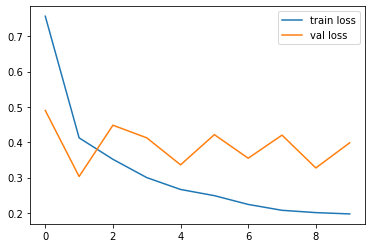

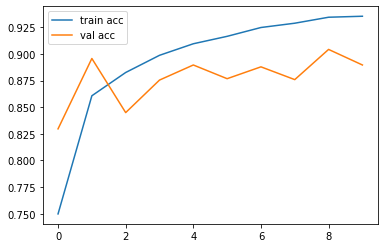

In [20]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# y_pred = classifier.predict(test_datasetset)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('Tomatto_model_VGG16_update.h5')

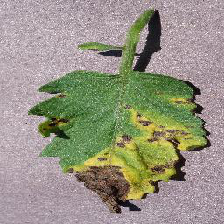

In [28]:
from keras.preprocessing import image
new_image = image.load_img('/content/drive/My Drive/all_dataset/Tomato-Leaf-Disease/valid/Tomato___Septoria_leaf_spot/02ab6821-757a-401b-ac04-919fdceee1f0___Matt.S_CG 1653_flipTB.JPG', target_size = (224, 224))
new_image

In [29]:
new_image = image.img_to_array(new_image)


In [30]:
new_image = np.expand_dims(new_image, axis = 0)
img_data=preprocess_input(new_image)
img_data.shape

(1, 224, 224, 3)

In [31]:
result=np.argmax(model.predict(img_data), axis=1)

In [32]:

result=np.argmax(model.predict(img_data), axis=1)
if result == 0:
  prediction = 'Tomato___Bacterial_spot'
elif result == 1:
  prediction = 'Tomato___Early_blight'
elif result == 2:
  prediction = 'Tomato___Late_blight'
elif result == 3:
  prediction = 'Tomato___Leaf_Mold'
elif result == 4:
  prediction = 'Tomato___Septoria_leaf_spot'
elif result == 5:
  prediction = 'Tomato___Spider_mites Two-spotted_spider_mite'
elif result == 6:
  prediction = 'Tomato___Target_Spot'
elif result == 7:
  prediction = 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
elif result == 8:
  prediction = 'Tomato___Tomato_mosaic_virus'
elif result == 9:
  prediction = 'Tomato___healthy'



print(prediction)



Tomato___Septoria_leaf_spot
